In [70]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn
import glob, os    


In [71]:
# Code taken from https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

path = 'random_samples'                  # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))    
list = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    list.append(df)

    
df = pd.concat(list, axis=0, ignore_index=False)

print(type(df))
print(df)



<class 'pandas.core.frame.DataFrame'>
   Number of LSTM units  Lookback period  Learning rate  Average MSE
0                    11               19         0.0500     0.000004
1                    35               10         0.5000     0.000133
0                     4               22         0.0010     0.000003
1                     8               25         0.0010     0.000003
0                    15               27         0.0005     0.000003
1                    28               40         0.1000     0.000013


In [95]:
LSTM_units =df['Number of LSTM units'].values
lookback = df['Lookback period'].values
learning_rate = df['Learning rate'].values
Avg_MSE = df['Average MSE'].values



In [96]:
print(LSTM_units)

[11 35  4  8 15 28]


In [97]:
jet=plt.get_cmap('coolwarm')

[11 35  4  8 15 28]
[19 10 22 25 27 40]
[0.05   0.5    0.001  0.001  0.0005 0.1   ]
[4.10409191e-06 1.32712883e-04 3.44072437e-06 3.44734516e-06
 3.43456631e-06 1.31389430e-05]


NameError: name 'mticker' is not defined

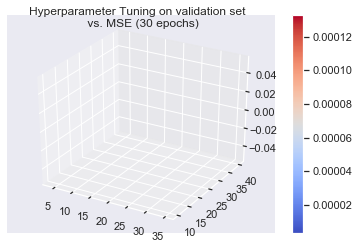

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = LSTM_units
ys = lookback
zs = learning_rate
c = Avg_MSE

print(xs)
print(ys)
print(zs)
print(c)
plt.scatter(xs,ys,np.log10(zs), c=c, cmap=jet)
#plt.xlabel('LSTM units')
#plt.ylabel('Lookback period')
#plt.zlabel('Learning rate')

plt.title('Hyperparameter Tuning on validation set  \n vs. MSE (30 epochs)')
plt.colorbar()

def log_tick_formatter(val, pos=None):
    return "{:.0e}".format(10**val)

ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
seaborn.set()
plt.show()